In [1]:
coords = []
bin_covs = []
with open("bins_distribution.100bp.csv", 'r') as file:
    for line in file:
        if not line.startswith("#"):
            columns = line.strip().split(",")
            coords.append((int(columns[0]), int(columns[1])))
            bin_covs.extend(int(columns[1])*[int(columns[0])])

In [2]:
coords.sort()
bin_covs.sort()

In [3]:
from scipy.stats import nbinom as nb
import numpy as np

def ab_to_rp(m, alpha, beta):
    mu = alpha * m
    v = max((beta * m) ** 2, mu + 1e-6)

    r = mu ** 2 / (v - mu)
    p = mu / v

    return r, p

alpha = 17.10551800559137
beta = 4.006225555887628

r, p = ab_to_rp(100, alpha, beta)



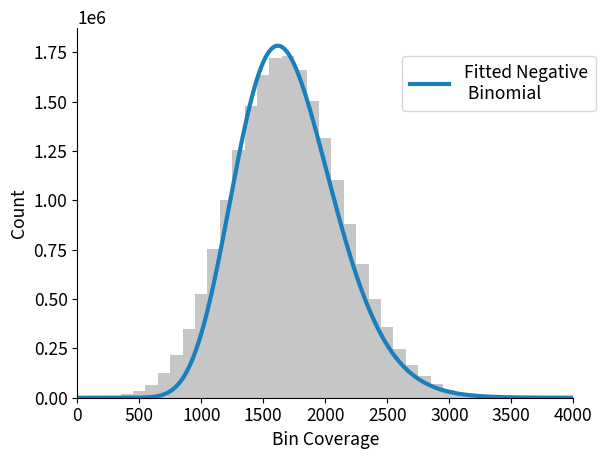

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from pyfonts import load_google_font

font_path = load_google_font("Source Sans 3")

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 14})
mpl.rcParams['font.family'] = 'Source Sans 3'

# If font_path is a FontProperties object, get the actual path
if hasattr(font_path, 'get_file'):
    mpl.font_manager.fontManager.addfont(font_path.get_file())
else:
    mpl.font_manager.fontManager.addfont(font_path)

covs, weight = zip(*coords)
x = np.arange(0, 4000)
binwidth = 100
bins = np.arange(0, 4000, binwidth) - 0.5 * binwidth
plt.hist(covs, weights=weight, bins=bins, alpha=0.8, color='#b8b8b8')
plt.plot(x, nb.pmf(x, r, p) * 1.75e9, label='Fitted Negative\n Binomial', color="#1a80bb", linewidth=3)
plt.xlabel("Bin Coverage")
plt.ylabel("Count")
plt.legend(loc='center', bbox_to_anchor=(0.85, 0.85), ncol=2)
plt.xlim(0, 4000)
plt.savefig("bincov_distribution.svg")
plt.show()